In [9]:
import pandas as pd
import numpy as np
import os
import time
import copy
import pathlib, tempfile

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from graphviz import Digraph
from joblib import Parallel, delayed
from scipy import stats

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
from numba import njit, jit, int32, float64
from lifelines import KaplanMeierFitter, NelsonAalenFitter

import survivors.datasets as ds

import cProfile
import pstats

%load_ext line_profiler
%load_ext scalene

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The scalene extension is already loaded. To reload it, use:
  %reload_ext scalene


In [10]:
# axis_font = {'fontname':'Arial', 'size':'14'}
axis_font = {'fontname':'Times New Roman', 'size':'16'}
sns.set_context(rc={'lines.linewidth':2})

In [64]:
X, y, features, categ, sch_nan = ds.load_support2_dataset()

df = X.copy()
df["time"] = y["time"]
df["cens"] = y["cens"]
df = df.fillna(0).replace(np.nan, 0).replace(np.inf, 0)

========== GBSG ==========
TERMINAL
shapiro: 3.073576983203541e-12
anderson: False
kstest: 8.707625221366581e-05
CENSURING
shapiro: 6.188484803715255e-06
anderson: False
kstest: 0.010449985619091745
kstest:6.900e-29
Welch’s t-test:9.406e-37


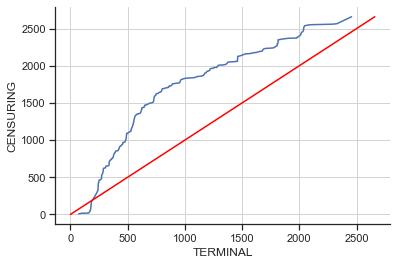

========== PBC ==========
TERMINAL
shapiro: 6.380729900001825e-08
anderson: False
kstest: 0.010458360496362808
CENSURING
shapiro: 8.941491813629909e-08
anderson: False
kstest: 0.0344995095082652
kstest:4.924e-17
Welch’s t-test:7.190e-16


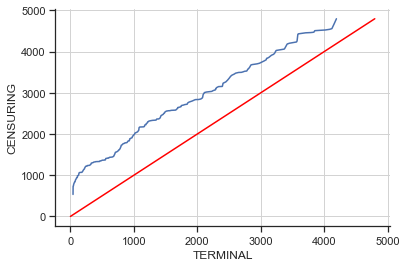

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: Mean of emp

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mean_' + c] = df_agg[c].apply(np.nanmean)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['min_' + c] = df_agg[c].apply(np.nanmin)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['max_

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['min_' + c] = df_agg[c].apply(np.nanmin)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['max_

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mean_' + c] = df_agg[c].apply(np.nanmean)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mean_' + c] = df_agg[c].apply(np.nanmean)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['min_' + c] = df_agg[c].apply(np.nanmin)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['max_

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mean_' + c] = df_agg[c].apply(np.nanmean)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: Mean of empty slice
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agg['mean_' + c] = df_agg[c].apply(np.nanmean)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\pandas\core\apply.py:1076: RuntimeWarning: All-NaN axis encountered
  mapped = lib.map_infer(
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.6.2-py3.10.egg\survivors\datasets\other.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

========== WUHAN ==========
TERMINAL
shapiro: 5.156169748435878e-14
anderson: False
kstest: 6.262344496516375e-05
CENSURING
shapiro: 9.516253339825198e-05
anderson: False
kstest: 0.13584607225683823
kstest:2.276e-18
Welch’s t-test:1.383e-13


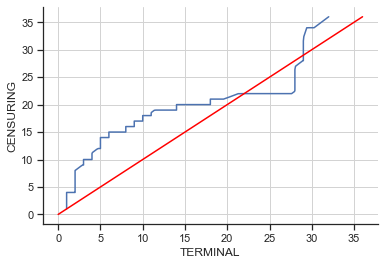

========== smarto ==========
TERMINAL
shapiro: 4.584424796028183e-15
anderson: False
kstest: 5.163287303096077e-06
CENSURING
shapiro: 4.984544939391719e-33
anderson: False
kstest: 1.5099318421014455e-18
kstest:1.390e-12
Welch’s t-test:5.284e-22


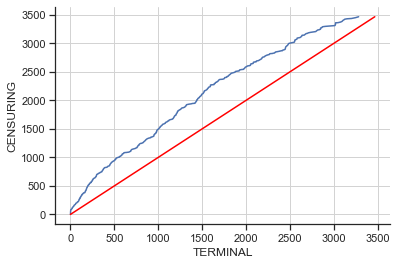

========== rott2 ==========
TERMINAL
shapiro: 3.4704111678785543e-23
anderson: False
kstest: 9.500579144446715e-10
CENSURING
shapiro: 0.0006252131424844265
anderson: False
kstest: 0.16722609704556773
kstest:2.254e-193
Welch’s t-test:4.966e-228


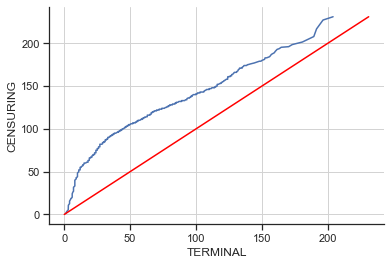

========== support2 ==========
TERMINAL
shapiro: 0.0
anderson: False


C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


kstest: 1.2864e-319
CENSURING
shapiro: 5.028635769866065e-38
anderson: False
kstest: 3.7225764776034186e-32
kstest:0.000e+00
Welch’s t-test:0.000e+00


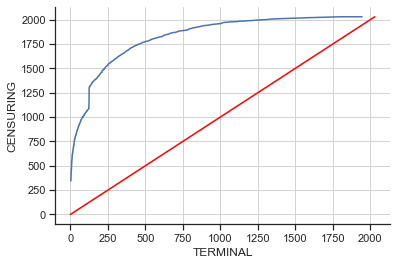

In [195]:
DATASETS_LOAD = {
    "GBSG": ds.load_gbsg_dataset,
    "PBC": ds.load_pbc_dataset,
    "WUHAN": ds.load_wuhan_dataset,
    "smarto": ds.load_smarto_dataset,
    "rott2": ds.load_rott2_dataset,
    "support2": ds.load_support2_dataset
}

def test_normal(sample):
    print("shapiro:", stats.shapiro(sample).pvalue)
    ad = stats.anderson(sample, 'norm')
    print("anderson:", ad.statistic < ad.critical_values[np.where(ad.significance_level == 2.5)][0])
    np.random.seed(42)
    print("kstest:", stats.kstest(sample, 
                       np.random.normal(np.mean(sample), 
                                        np.std(sample), 100000), method="exact").pvalue)

for name, loader in DATASETS_LOAD.items():
    X, y, features, categ, sch_nan = loader()
    
    df = X.copy()
    df["time"] = y["time"]
    df["cens"] = y["cens"]
    df = df.fillna(0).replace(np.nan, 0).replace(np.inf, 0)
    print("="*10, name, "="*10)
    print("TERMINAL")
    test_normal(df[df["cens"] == 1]["time"])
    print("CENSURING")
    test_normal(df[df["cens"] == 0]["time"])
    print(f'kstest:{stats.kstest(df[df["cens"] == 1]["time"], df[df["cens"] == 0]["time"]).pvalue:.3e}')
    print(f'Welch’s t-test:{stats.ttest_ind(df[df["cens"] == 1]["time"], df[df["cens"] == 0]["time"], equal_var=False).pvalue:.3e}')
    plt.plot(np.quantile(df[df["cens"] == 1]["time"], np.linspace(0, 1, 1000)),
                np.quantile(df[df["cens"] == 0]["time"], np.linspace(0, 1, 1000)))
    plt.plot([0, df["time"].max()], [0, df["time"].max()], c="red")
    plt.xlabel("TERMINAL")
    plt.ylabel("CENSURING")
    plt.show()

In [179]:
from lifelines.statistics import proportional_hazard_test

cph = CoxPHFitter(penalizer=0.000001).fit(df, 'time', 'cens')  # strata=[feat]

plt.figure(figsize=(14, 7))
cph.check_assumptions(df, p_value_threshold=0.1)

# results = proportional_hazard_test(cph, df, time_transform='rank')
# results.print_summary(decimals=3, model="untransformed variables")

The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 985 total observations, 565 right-censored observations>
         test_name = proportional_hazard_test

---
                       test_statistic      p  -log2(p)
fac_chemo        km              0.04   0.85      0.23
                 rank            0.04   0.85      0.24
fac_grade        km              1.99   0.16      2.66
                 rank            2.65   0.10      3.27
fac_hormon       km              0.07   0.79      0.35
                 rank            0.05   0.82      0.28
fac_meno         km              3.74   0.05      4.24
                 rank            3.69   0.05      4.19
fac_recent       km              0.92   0.34      1.57
                 rank            1.04   0.31      1.70
fac_tsize        km              0.07   0.79      0.33
                 rank            0.05   0.82      0.28
num_age          km              6.33   0.01      6.40
                 rank            7.57   0.01      7.39
num_estrogen     km             16.74 <0.005     14.51
                 rank           21.51 <0.005     18.11
num_nodes        km              3.05   0.08      3.63
                 rank            3.57   0.06      4.09
num_progesterone km              1.37   0.24      2.05
                 rank            1.48   0.22      2.16
num_year         km              1.04   0.31      1.70
                 rank            1.16   0.28      1.82



1. Variable 'num_age' failed the non-proportional test: p-value is 0.0059.

   Advice 1: the functional form of the variable 'num_age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'num_age' using pd.cut, and then specify it in
`strata=['num_age', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'num_nodes' failed the non-proportional test: p-value is 0.0587.

   Advice 1: the functional form of the variable 'num_nodes' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional f

[]

<Figure size 1008x504 with 0 Axes>

In [66]:
from typing import List, Optional, Dict, Any, Iterable
from textwrap import dedent, fill
from autograd import numpy as anp
import numpy as np
from pandas import DataFrame, Series
from lifelines.statistics import proportional_hazard_test, TimeTransformers
from lifelines.utils import format_p_value
from lifelines.utils.lowess import lowess


def plot_assumptions(cph,
        training_df: DataFrame,
        p_value_threshold: float = 0.01,
        plot_n_bootstraps: int = 15,
        columns: Optional[List[str]] = None):    
    residuals = cph.compute_residuals(training_df, kind="scaled_schoenfeld")
    test_results = proportional_hazard_test(cph, training_df, time_transform=["rank", "km"], precomputed_residuals=residuals)

    residuals_and_duration = residuals.join(training_df[cph.duration_col])
    Xs = cph.regressors.transform_df(training_df)

    counter = 0
    n = residuals_and_duration.shape[0]
    axes = []

    for variable in cph.params_.index.intersection(columns or cph.params_.index):
        minumum_observed_p_value = test_results.summary.loc[variable, "p"].min()
        if np.round(minumum_observed_p_value, 2) > p_value_threshold:
            continue
        counter += 1
        # show plots
        axes.append([])
        fig = plt.figure(figsize=(14, 7))

        # plot variable against all time transformations.
        for i, (transform_name, transformer) in enumerate(TimeTransformers().iter(["rank", "km"]), start=1):
            p_value = test_results.summary.loc[(variable, transform_name), "p"]

            ax = fig.add_subplot(1, 2, i)

            y = residuals_and_duration[variable]
            tt = transformer(cph.durations, cph.event_observed, cph.weights)[cph.event_observed.values]

            ax.scatter(tt, y, alpha=0.75)

            y_lowess = lowess(tt.values, y.values)
            ax.plot(tt, y_lowess, color="k", alpha=1.0, linewidth=2)

            # bootstrap some possible other lowess lines. This is an approximation of the 100% confidence intervals
            for _ in range(plot_n_bootstraps):
                ix = sorted(np.random.choice(n, n))
                tt_ = tt.values[ix]
                y_lowess = lowess(tt_, y.values[ix])
                ax.plot(tt_, y_lowess, color="k", alpha=0.30)

            best_xlim = ax.get_xlim()
            ax.hlines(0, 0, tt.max(), linestyles="dashed", linewidths=1)
            ax.set_xlim(best_xlim)

            ax.set_xlabel("%s-transformed time\n(p=%.4f)" % (transform_name, p_value), fontsize=13)
            axes[-1].append(ax)

        fig.suptitle("Scaled Schoenfeld residuals of '%s'" % variable, fontsize=14)
        plt.tight_layout()
#         plt.subplots_adjust(top=0.90)

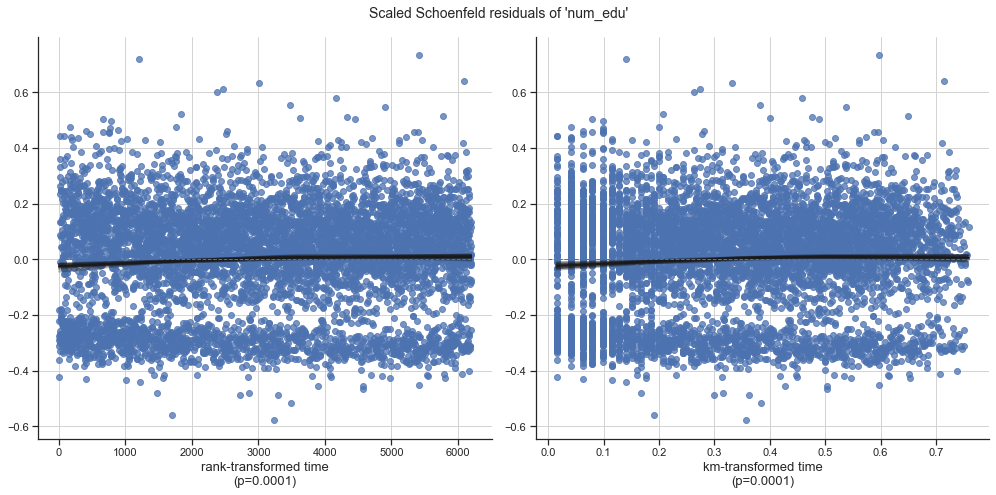

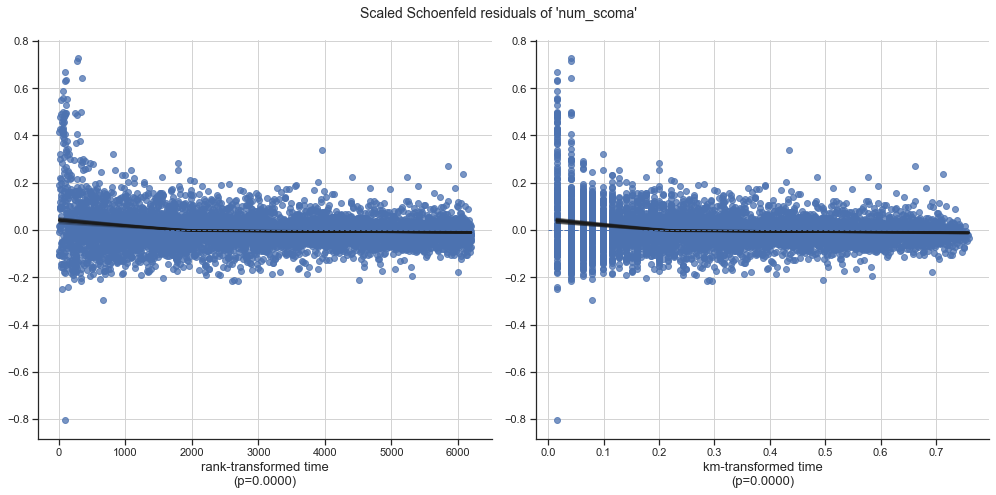

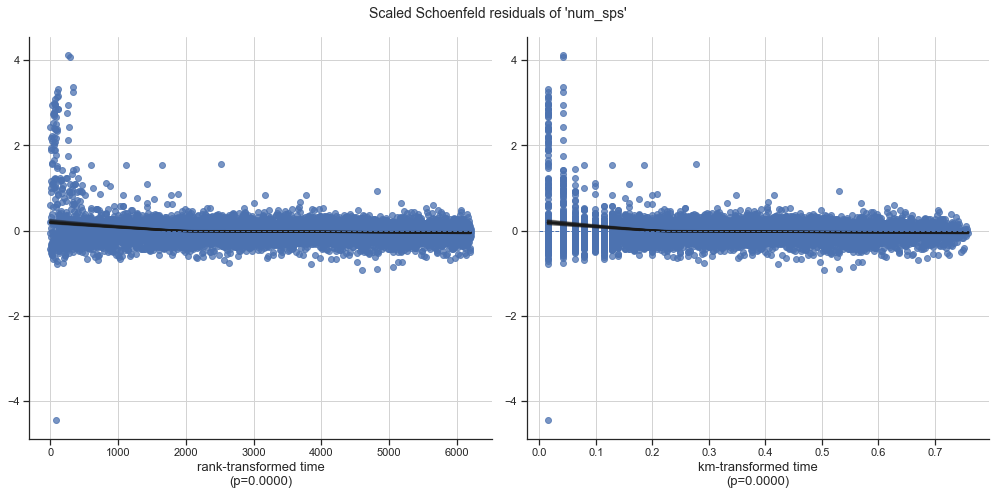

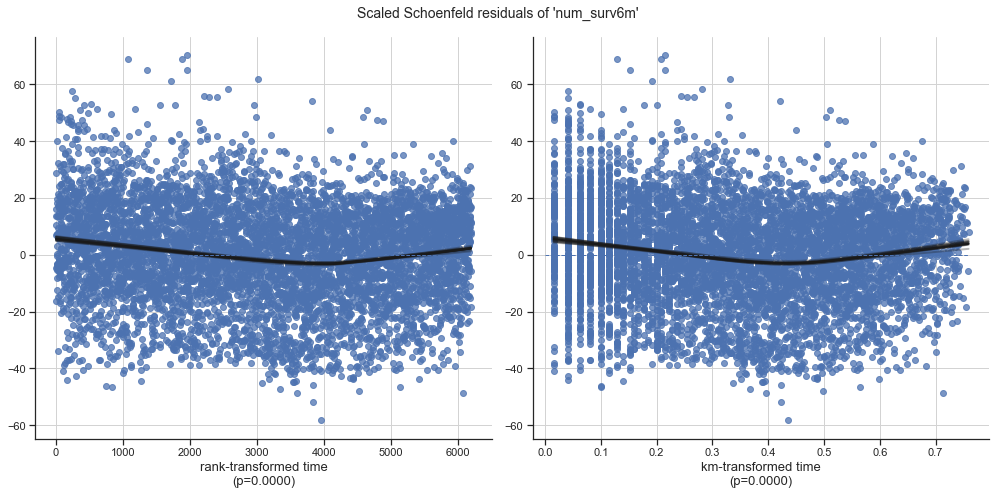

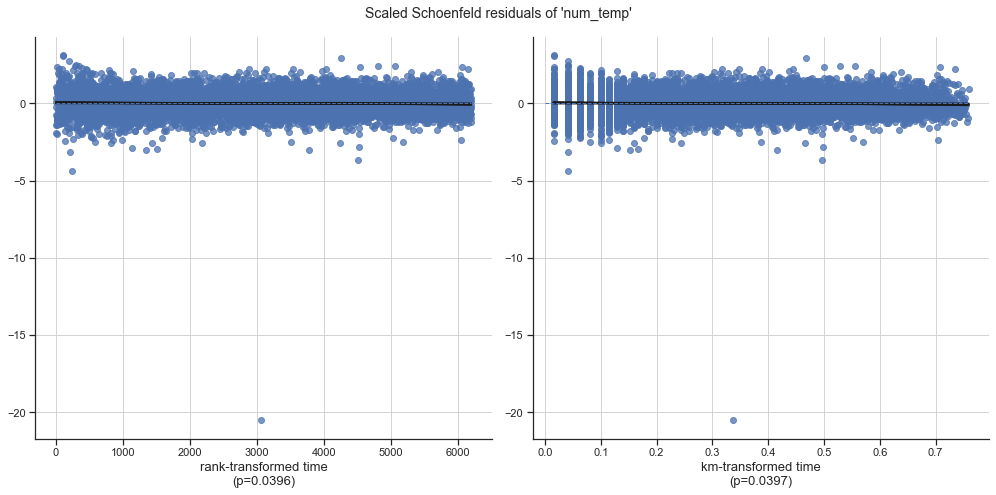

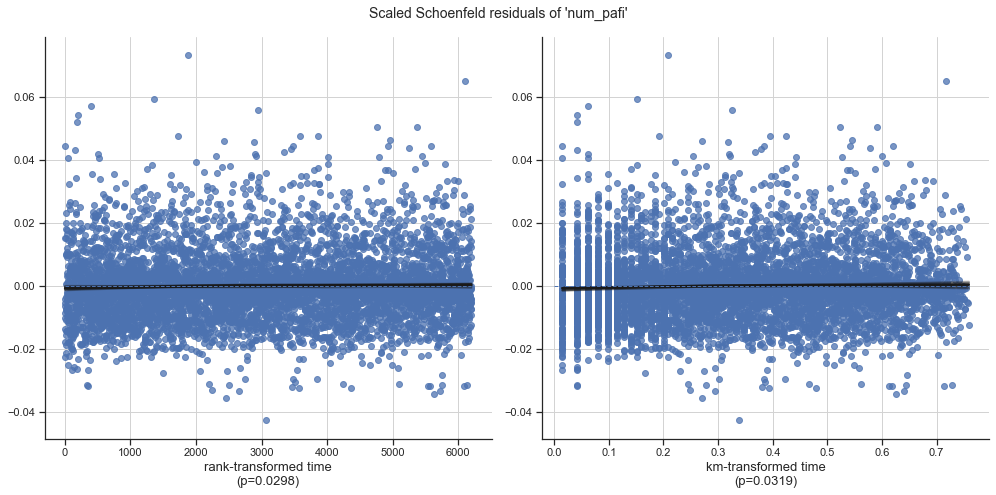

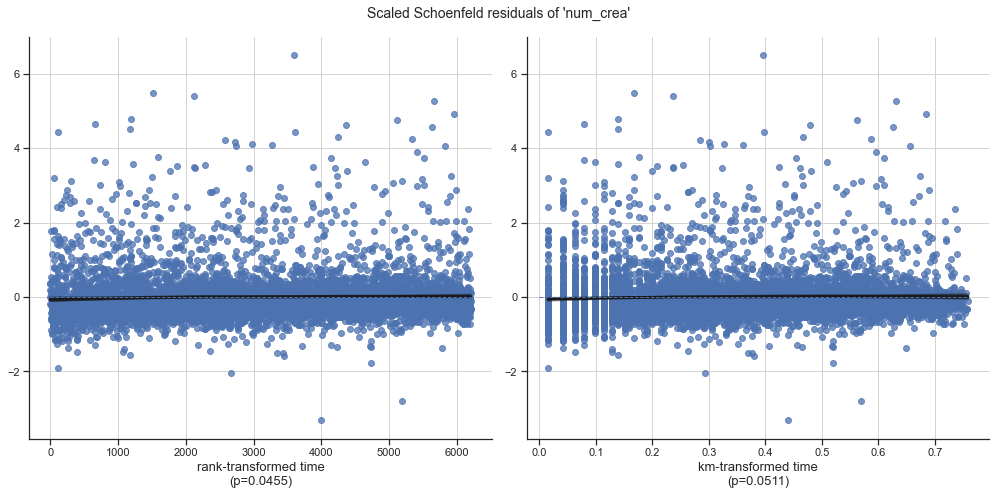

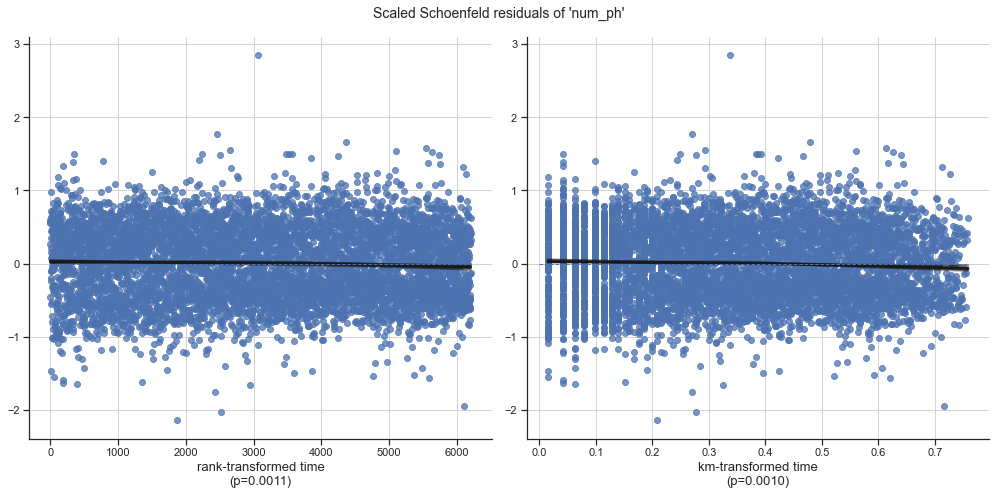

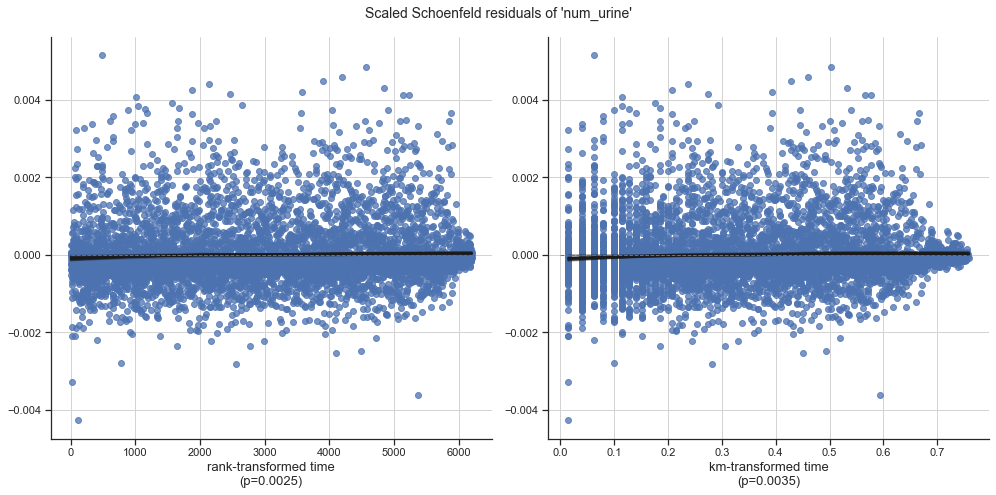

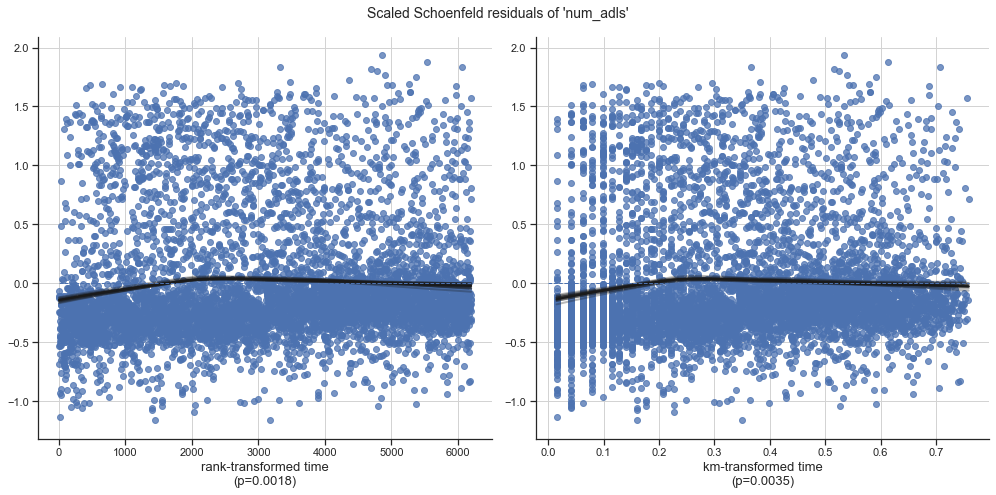

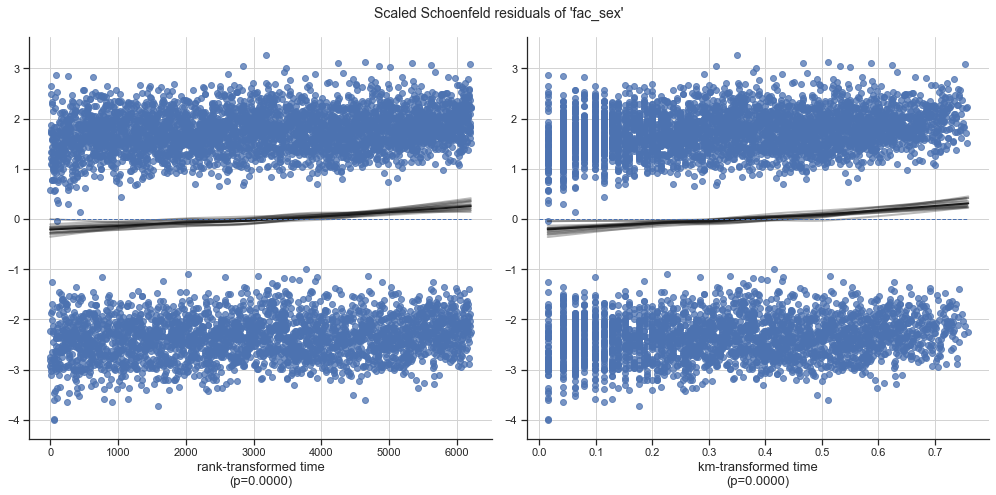

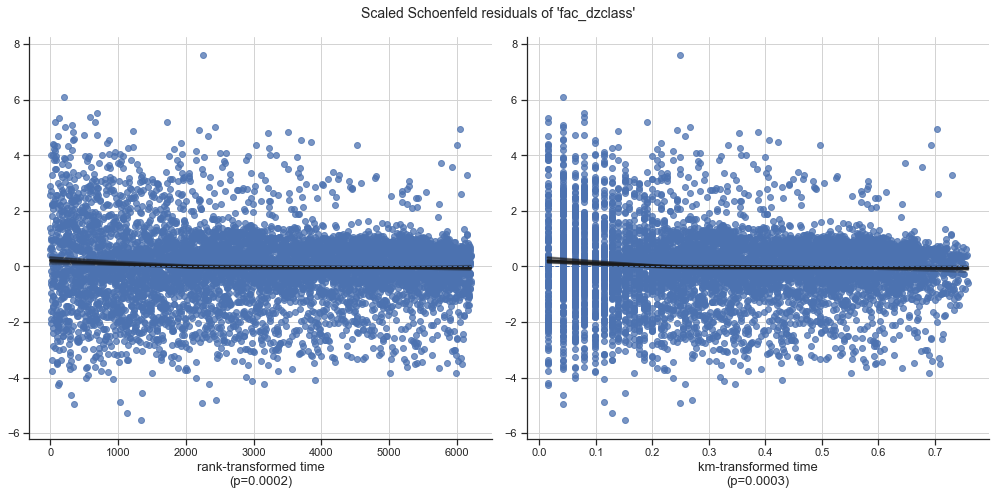

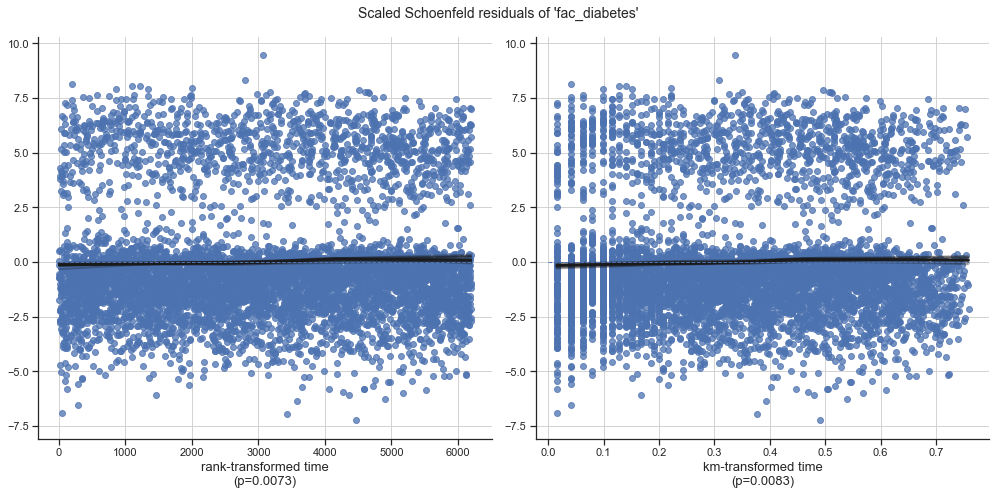

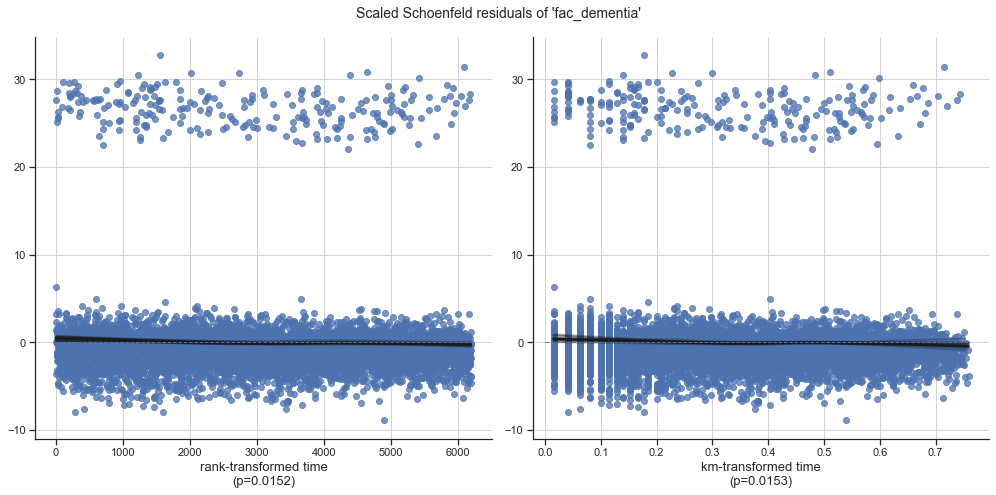

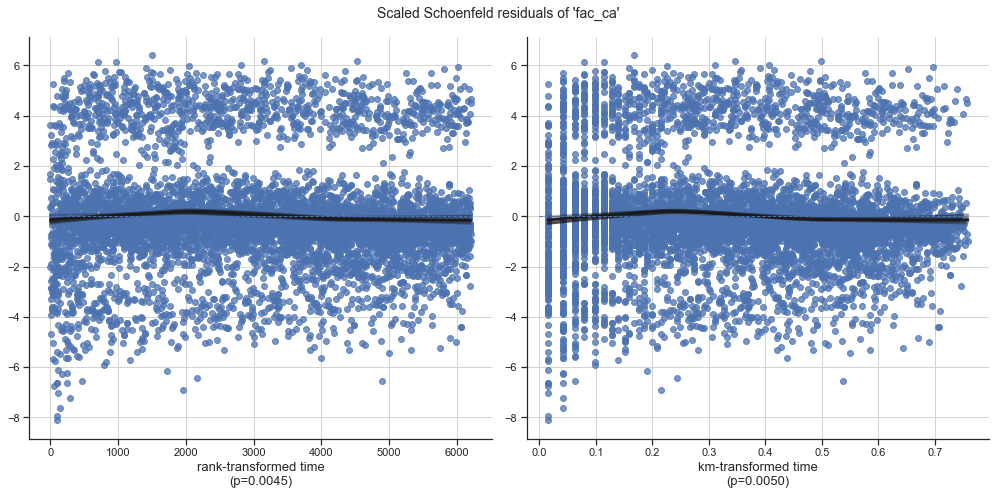

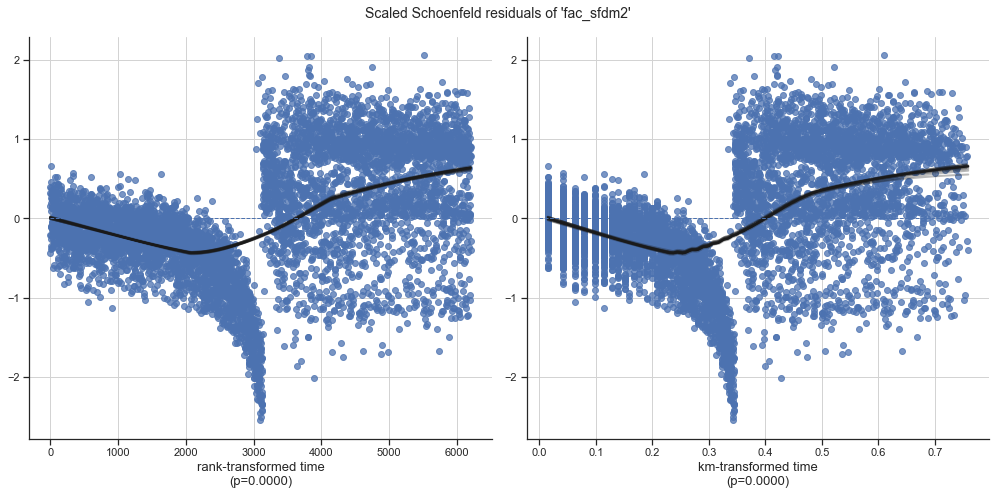

In [67]:
plot_assumptions(cph, df, p_value_threshold=0.05)

KeyError: 'tumgrad'

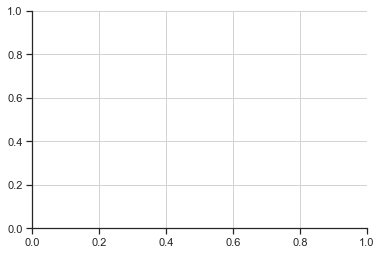

In [47]:
# feat = "menostat"  # GBSG (menostat)
feat = "tumgrad"  # PBC (sex, tumgrad)

bins = np.unique(y["time"])

fig, axs = plt.subplots(figsize=(6, 4))
for v in np.unique(df[feat]):
    index = df.query(f"{feat} == {v}").index
    
    kmf = KaplanMeierFitter()
    kmf.fit(df.loc[index]['time'], event_observed=df.loc[index]['cens'])
    sf_train = kmf.survival_function_at_times(bins).to_numpy()
    plt.plot(bins, sf_train, label=f"{feat}={v}")
plt.ylabel("Вероятность выживания", **axis_font)
plt.xlabel("Время", **axis_font)
plt.legend()

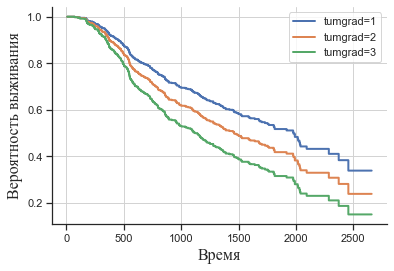

In [25]:
from lifelines import CoxPHFitter
df1 = df[[feat, "time", "cens"]]

cph.plot_partial_effects_on_outcome(feat, plot_baseline=False, 
                                    values=np.unique(X[feat]))
plt.ylabel("Вероятность выживания", **axis_font)
plt.xlabel("Время", **axis_font)
plt.legend()

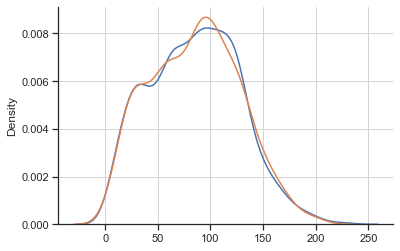

In [166]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from survivors.experiments.grid import generate_sample, prepare_sample, count_metric

# X, y, features, categ, sch_nan = ds.load_actg_dataset()
X, y, features, categ, sch_nan = ds.load_rott2_dataset()
# X, y, features, categ, sch_nan = ds.load_wuhan_dataset()

qs = np.quantile(y["time"], np.linspace(0.2, 0.8, 4))
time_discr = np.searchsorted(qs, y["time"])

discr = np.char.add(time_discr.astype(str), y["cens"].astype(str))
X_TR, X_HO = train_test_split(X, stratify=discr, test_size=0.33, random_state=42)
X_tr, y_tr, X_HO, y_HO, bins_HO = prepare_sample(X, y, X_TR.index, X_HO.index)

df = X_HO.copy()
df["time"] = y_HO["time"]
df["cens"] = y_HO["cens"]

df_tr = X_tr.copy()
df_tr["time"] = y_tr["time"]
df_tr["cens"] = y_tr["cens"]

sns.kdeplot(y_tr["time"], label="train")
sns.kdeplot(y_HO["time"], label="HO")
plt.show()

In [173]:
from survivors.tree import CRAID
p = {'balance': None, 'categ': categ, 'criterion': 'peto', 'cut': False, 'depth': 15, 
     'ens_metric_name': 'IBS_REMAIN', 'l_reg': 0.0,
     'leaf_model': 'base_zero_after', 
     'max_features': 1.0, 'min_samples_leaf': 0.05, 'n_jobs': 1, 'signif': 0.1, 'woe': True}

tree = CRAID(**p)
tree.fit(X_tr, y_tr)

pred_time = tree.predict(X_HO, target="time")
pred_surv = tree.predict_at_times(X_HO, bins=bins_HO, mode="surv")
pred_surv[:, -1] = 0
pred_surv[:, 0] = 1

pred_surv_tr = tree.predict_at_times(X_tr, bins=bins_HO, mode="surv")
pred_surv_tr[:, -1] = 0
pred_surv_tr[:, 0] = 1
    
pred_haz = tree.predict_at_times(X_HO, bins=bins_HO, mode="hazard")

auprc_by_obs_tr = metr.auprc(y_tr, y_tr, tree.predict_at_times(X_tr, bins=bins_HO, mode="surv"), bins_HO, axis=0)
auprc_by_obs_HO = metr.auprc(y_tr, y_HO, tree.predict_at_times(X_HO, bins=bins_HO, mode="surv"), bins_HO, axis=0)

ibsrm_by_obs_tr = metr.ibs_remain(y_tr, y_tr, tree.predict_at_times(X_tr, bins=bins_HO, mode="surv"), bins_HO, axis=0)
ibsrm_by_obs_HO = metr.ibs_remain(y_tr, y_HO, tree.predict_at_times(X_HO, bins=bins_HO, mode="surv"), bins_HO, axis=0)

In [171]:
def get_color(a):
    return np.where(a, "blue", "orange")

(num_nodes > 4.5) & (num_progesterone > 48.0)


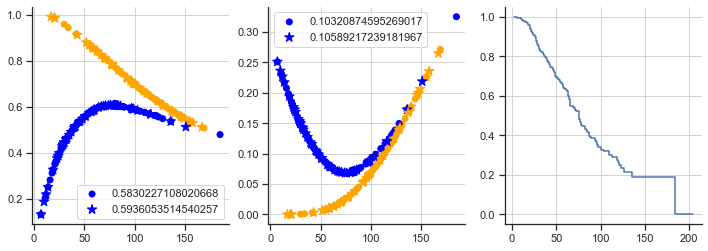

((num_nodes <= 4.5)| nan) & (num_nodes > 1.5) & ((num_estrogen <= 60.0)| nan)


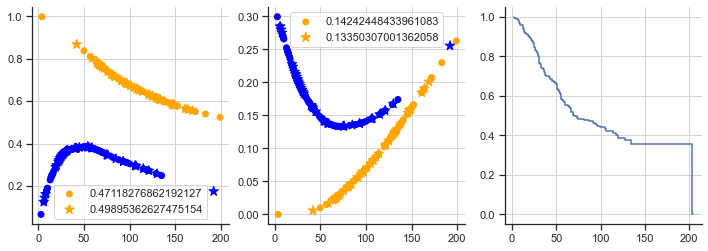

((num_nodes <= 4.5)| nan) & (num_nodes > 1.5) & (num_estrogen > 60.0)


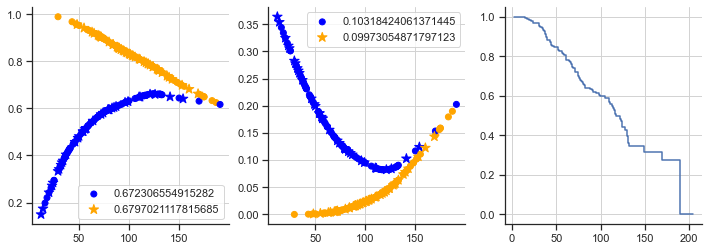

(num_nodes > 4.5) & ((num_progesterone <= 48.0)| nan) & ((num_nodes <= 8.5)| nan)


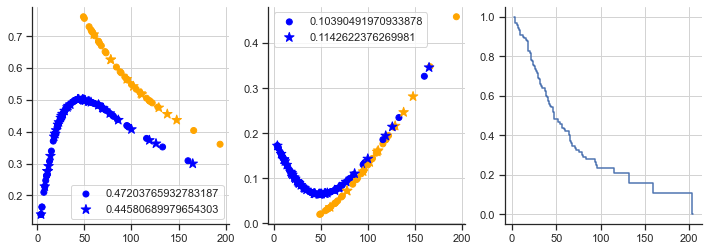

(num_nodes > 4.5) & ((num_progesterone <= 48.0)| nan) & (num_nodes > 8.5)


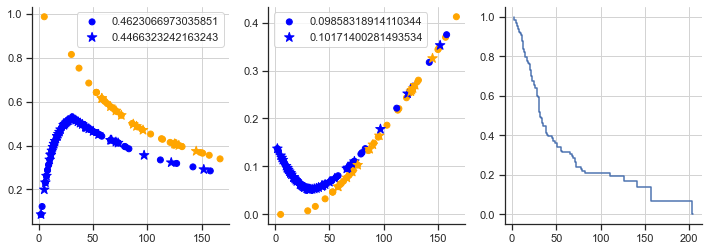

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & (num_age > 66.5) & ((fac_tsize in [0.0])| nan)


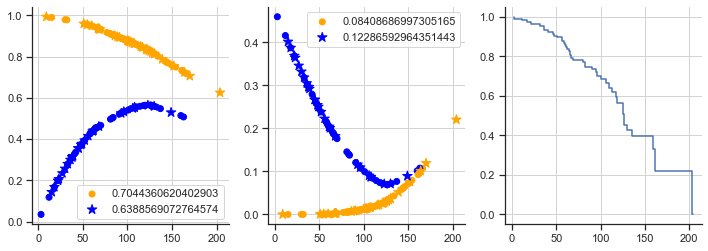

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & (num_age > 66.5) & (fac_tsize in [1.0, 2.0])


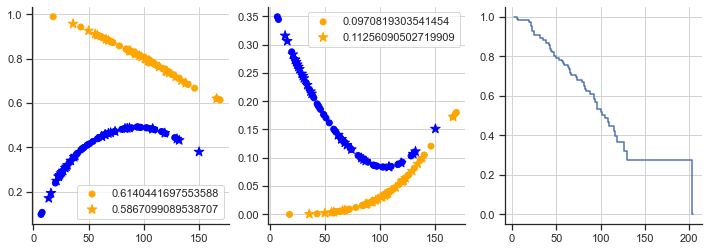

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & ((num_year <= 1986.5)| nan)


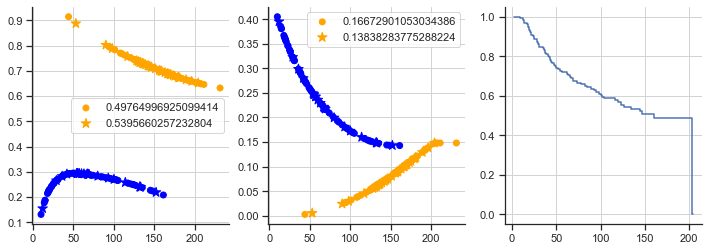

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & (fac_tsize in [1.0, 2.0])


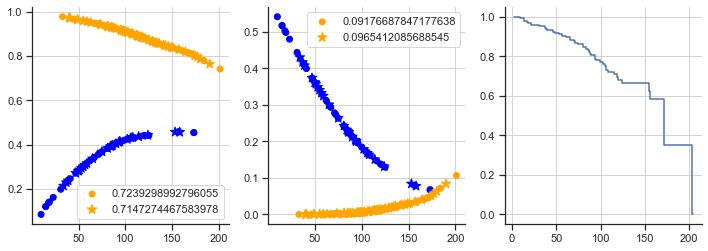

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & ((num_age <= 48.5)| nan)


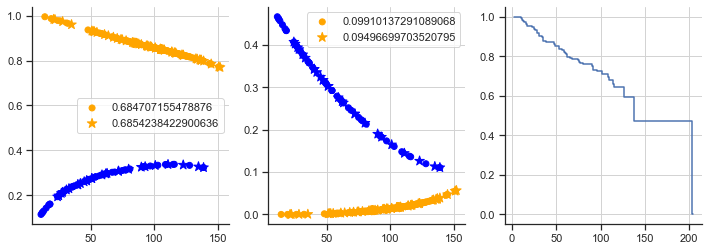

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & ((fac_tsize in [0.0])| nan) & ((num_year <= 1988.5)| nan)


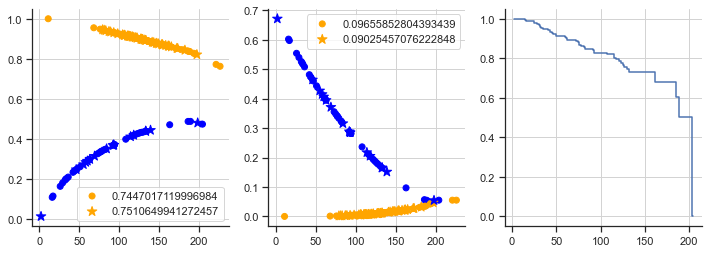

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & ((fac_tsize in [0.0])| nan) & (num_year > 1988.5)


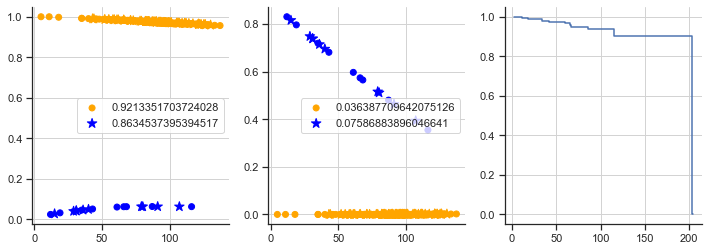

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & (num_age > 48.5) & ((num_progesterone <= 4.5)| nan)


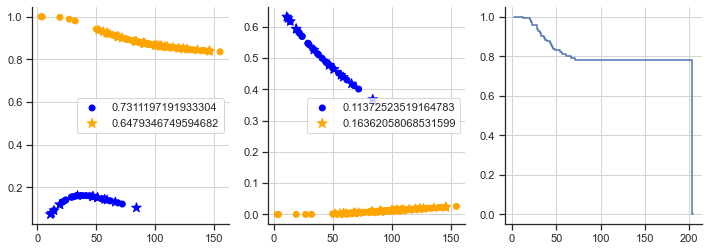

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & (num_age > 48.5) & (num_progesterone > 4.5)


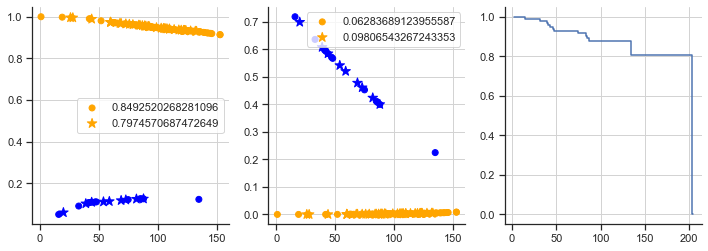

In [172]:
ind_tr = tree.predict(X_tr, target="numb")
ind_HO = tree.predict(X_HO, target="numb")

for k, n in tree.nodes.items():
    if not(n.is_leaf):
        continue
    print(n.get_full_rule())
    flag_ind_tr = ind_tr == k
    flag_ind_HO = ind_HO == k
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].scatter(y_tr[flag_ind_tr]["time"], auprc_by_obs_tr[flag_ind_tr], c=get_color(y_tr[flag_ind_tr]["cens"]), label=np.mean(auprc_by_obs_tr[flag_ind_tr]))
    axes[0].scatter(y_HO[flag_ind_HO]["time"], auprc_by_obs_HO[flag_ind_HO], s=100, marker="*", c=get_color(y_HO[flag_ind_HO]["cens"]), label=np.mean(auprc_by_obs_HO[flag_ind_HO]))
    axes[0].legend()
    
    axes[1].scatter(y_tr[flag_ind_tr]["time"], ibsrm_by_obs_tr[flag_ind_tr], c=get_color(y_tr[flag_ind_tr]["cens"]), label=np.mean(ibsrm_by_obs_tr[flag_ind_tr]))
    axes[1].scatter(y_HO[flag_ind_HO]["time"], ibsrm_by_obs_HO[flag_ind_HO], s=100, marker="*", c=get_color(y_HO[flag_ind_HO]["cens"]), label=np.mean(ibsrm_by_obs_HO[flag_ind_HO]))
    axes[1].legend()
    
    #axes[2].step(bins_HO, pred_surv_tr[flag_ind_tr, :][0])
    axes[2].step(bins_HO, pred_surv[flag_ind_HO, :][0])
    plt.show()

(num_nodes > 4.5) & (num_progesterone > 48.0)


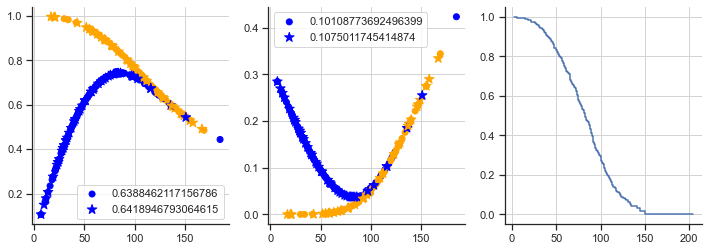

((num_nodes <= 4.5)| nan) & (num_nodes > 1.5) & ((num_estrogen <= 60.0)| nan)


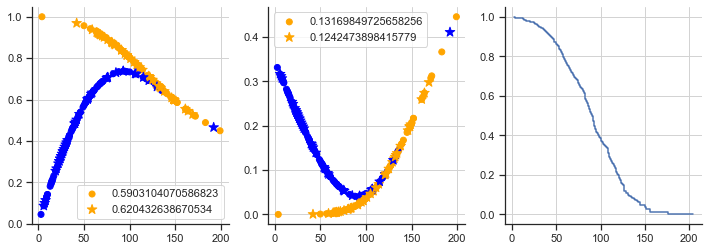

((num_nodes <= 4.5)| nan) & (num_nodes > 1.5) & (num_estrogen > 60.0)


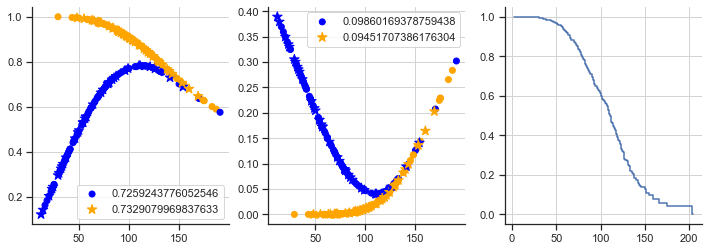

(num_nodes > 4.5) & ((num_progesterone <= 48.0)| nan) & ((num_nodes <= 8.5)| nan)


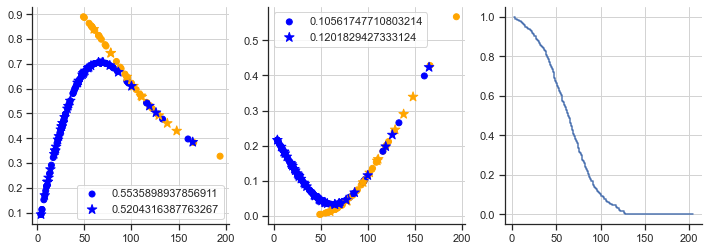

(num_nodes > 4.5) & ((num_progesterone <= 48.0)| nan) & (num_nodes > 8.5)


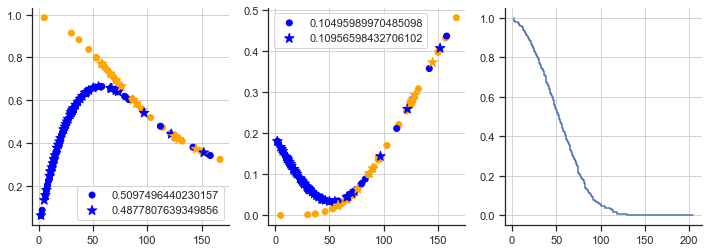

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & (num_age > 66.5) & ((fac_tsize in [0.0])| nan)


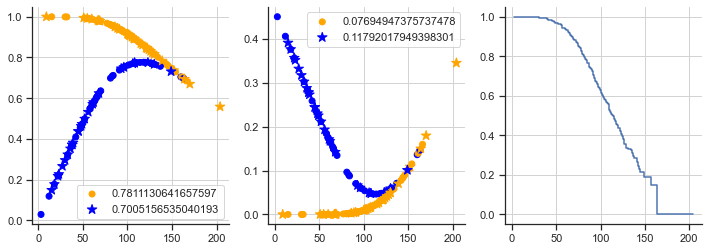

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & (num_age > 66.5) & (fac_tsize in [1.0, 2.0])


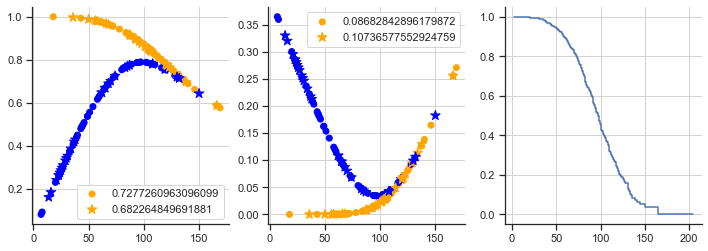

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & ((num_year <= 1986.5)| nan)


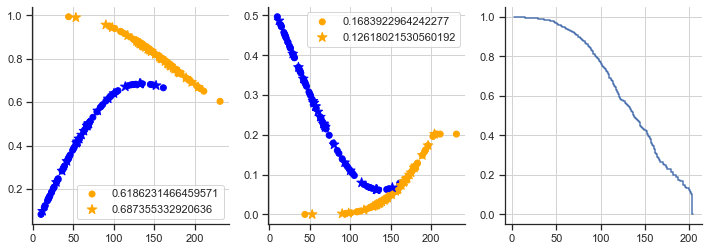

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & (fac_tsize in [1.0, 2.0])


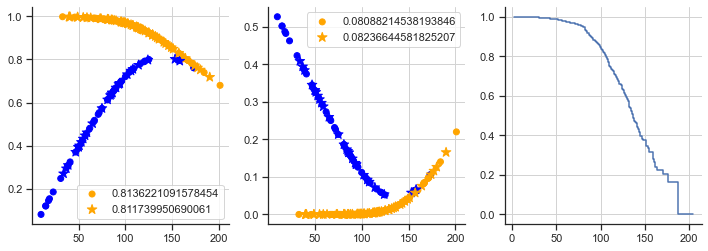

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & ((num_age <= 48.5)| nan)


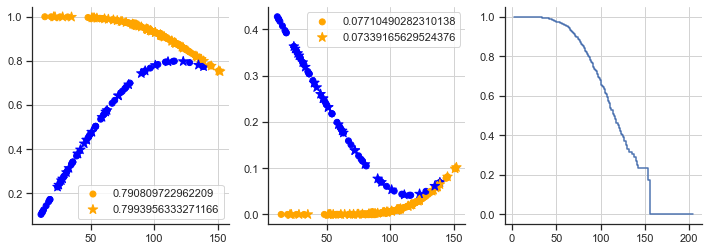

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & ((fac_tsize in [0.0])| nan) & ((num_year <= 1988.5)| nan)


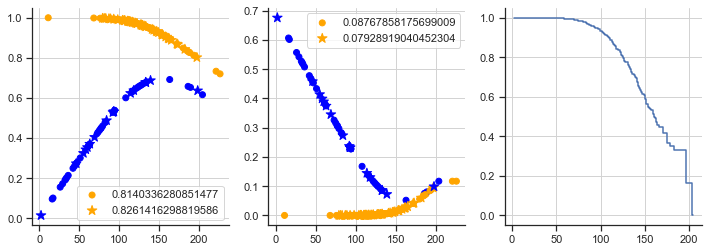

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & (num_progesterone > 58.0) & ((fac_tsize in [0.0])| nan) & (num_year > 1988.5)


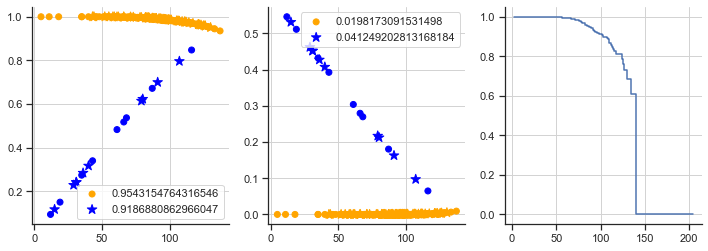

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & (num_age > 48.5) & ((num_progesterone <= 4.5)| nan)


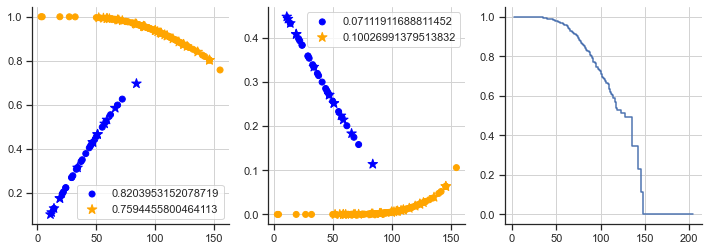

((num_nodes <= 4.5)| nan) & ((num_nodes <= 1.5)| nan) & ((num_age <= 66.5)| nan) & ((num_progesterone <= 58.0)| nan) & (num_year > 1986.5) & (num_age > 48.5) & (num_progesterone > 4.5)


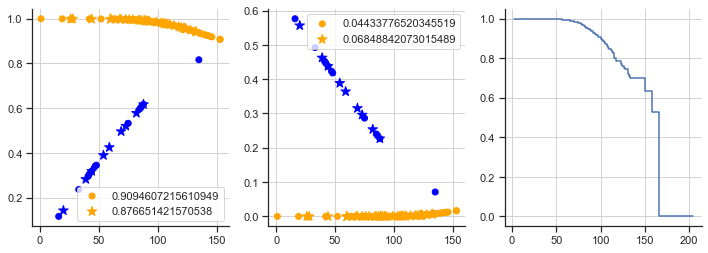

In [ ]:
ind_tr = tree.predict(X_tr, target="numb")
ind_HO = tree.predict(X_HO, target="numb")

for k, n in tree.nodes.items():
    if not(n.is_leaf):
        continue
    print(n.get_full_rule())
    flag_ind_tr = ind_tr == k
    flag_ind_HO = ind_HO == k
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].scatter(y_tr[flag_ind_tr]["time"], auprc_by_obs_tr[flag_ind_tr], c=get_color(y_tr[flag_ind_tr]["cens"]), label=np.mean(auprc_by_obs_tr[flag_ind_tr]))
    axes[0].scatter(y_HO[flag_ind_HO]["time"], auprc_by_obs_HO[flag_ind_HO], s=100, marker="*", c=get_color(y_HO[flag_ind_HO]["cens"]), label=np.mean(auprc_by_obs_HO[flag_ind_HO]))
    axes[0].legend()
    axes[1].scatter(y_tr[flag_ind_tr]["time"], ibsrm_by_obs_tr[flag_ind_tr], c=get_color(y_tr[flag_ind_tr]["cens"]), label=np.mean(ibsrm_by_obs_tr[flag_ind_tr]))
    axes[1].scatter(y_HO[flag_ind_HO]["time"], ibsrm_by_obs_HO[flag_ind_HO], s=100, marker="*", c=get_color(y_HO[flag_ind_HO]["cens"]), label=np.mean(ibsrm_by_obs_HO[flag_ind_HO]))
    axes[1].legend()
    axes[2].step(bins_HO, pred_surv[flag_ind_HO, :][0])
    plt.show()